In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('Customer churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#replacing blanks with 0 as tenure and no total charges are recorded

In [24]:
df["TotalCharges"]=df["TotalCharges"].replace(" ", "0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
df.describe()


,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [28]:
df["customerID"].duplicated().sum()

np.int64(0)

In [30]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

#converted 0 and 1 values to yes/no to make it easier to understand 

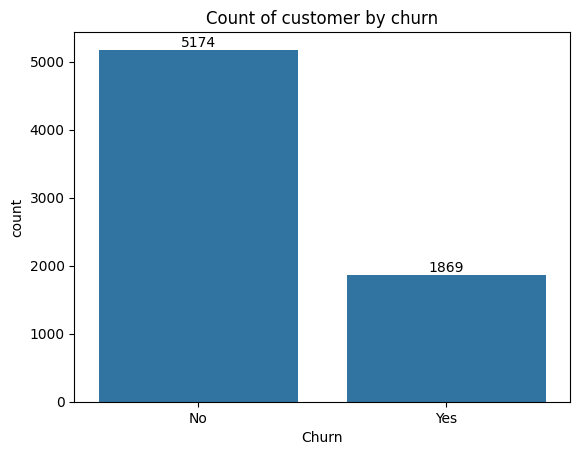

In [31]:
ax=sns.countplot(x= 'Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer by churn")
plt.show()

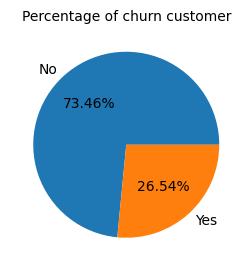

In [32]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of churn customer", fontsize=10)
plt.show()


#From given pie chart 26.54% of customer have churned out.
let us explore the reasons for it 

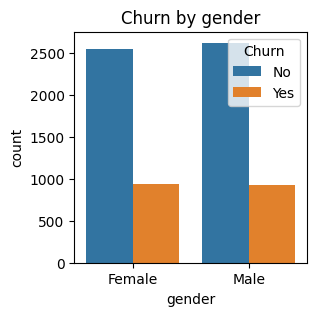

In [33]:
plt.figure(figsize=(3,3))
sns.countplot(x="gender", data=df, hue="Churn")
plt.title("Churn by gender")
plt.show()

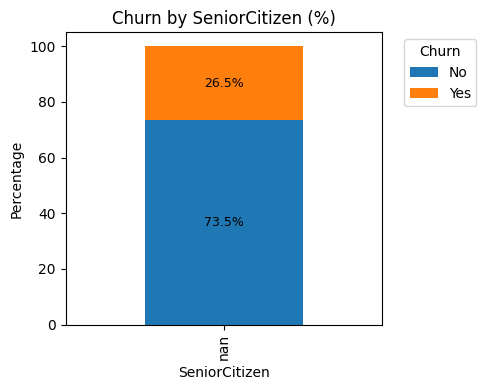

In [34]:
data = df.groupby(["SeniorCitizen", "Churn"]).size().reset_index(name="Count")

# Step 2: compute percentages using transform (keeps alignment)
data["Percent"] = data["Count"] / data.groupby("SeniorCitizen")["Count"].transform("sum") * 100

# Step 3: pivot to wide form
pivot = data.pivot(index="SeniorCitizen", columns="Churn", values="Percent").fillna(0)

# Optional: convert 0/1 to No/Yes for x-axis labels
pivot.index = pivot.index.map({0: "No", 1: "Yes"}).astype(str)

# Plot
ax = pivot.plot(kind="bar", stacked=True, figsize=(5,4))
plt.title("Churn by SeniorCitizen (%)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen")
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1), loc="upper left")

# Add percent labels
for i, (_, row) in enumerate(pivot.iterrows()):
    cum = 0
    for col in pivot.columns:
        val = row[col]
        if val > 0:
            plt.text(i, cum + val / 2, f"{val:.1f}%", ha="center", va="center", fontsize=9)
        cum += val

plt.tight_layout()
plt.show()

#Comparatively a greater percentage of senior citizen have churned out 

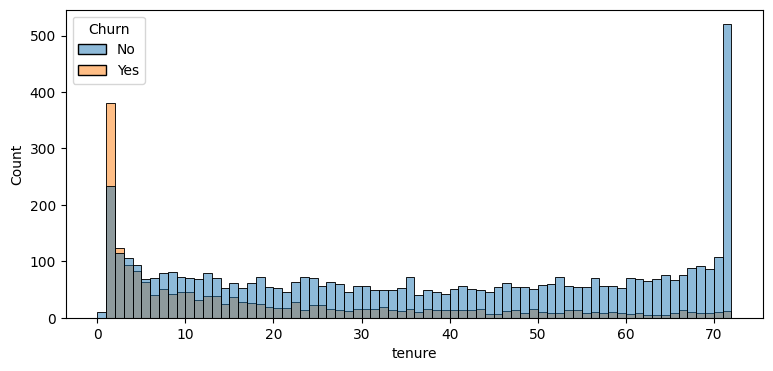

In [35]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure", data=df, bins=72, hue="Churn")
plt.show()

#People who have used services overa month have stayed and people leaving in 1 month have higher percentage of churn

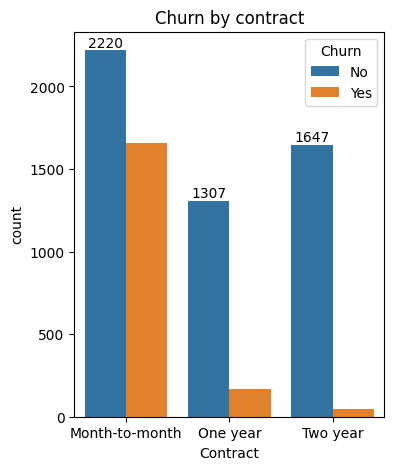

In [36]:
plt.figure(figsize=(4,5))
ax=sns.countplot(x="Contract", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by contract")
plt.show()

#People who have month to month contract are likely to churn than those who have one or two years contract

In [37]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

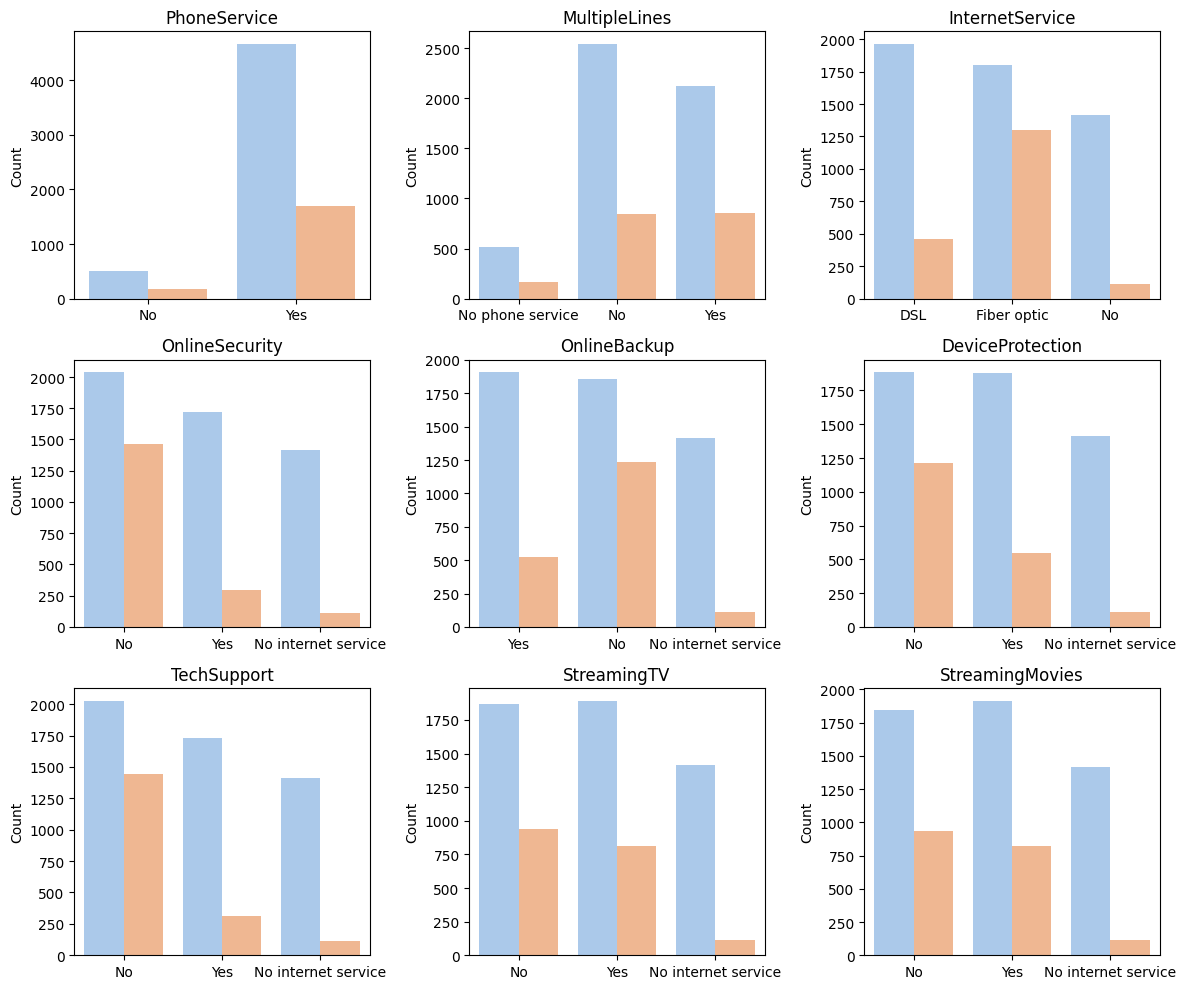

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(
        x=col, 
        hue="Churn",          # explicitly assign hue to avoid future warnings
        data=df, 
        ax=axes[i],
        palette='pastel', 
        legend=False
    )
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any unused subplot axes
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#From the visual summary of the plots, most customers have phone and internet services, with fiber optic being slightly more common than DSL. However, a large portion of users lack additional services like OnlineSecurity, DeviceProtection, or TechSupport. This suggests that while connectivity is widespread, value-added services remain underutilized, possibly influencing customer churn behavior.

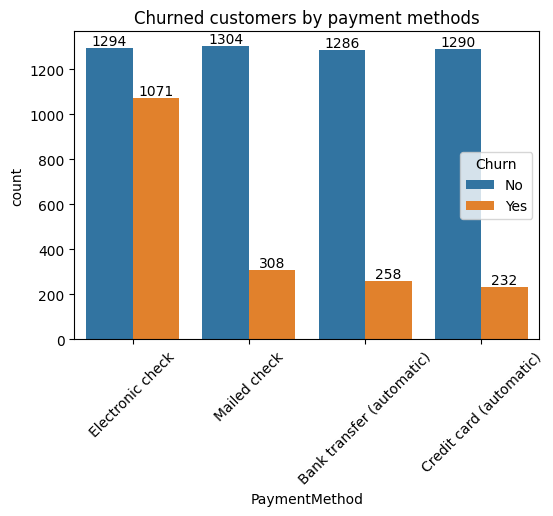

In [44]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned customers by payment methods")
plt.xticks(rotation=45)
plt.show()

#customer is likely to churn when he is using electronic checks 